In [223]:
from google.colab import files

In [224]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise (2).xlsx


In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [226]:
df=pd.read_excel('Data_Pathrise.xlsx')
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [227]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [228]:
df.drop('id',axis=1,inplace=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [230]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [231]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

In [232]:
#check the column pathrise_status(Active,Break,MI)
x=len(df[df['pathrise_status']=='Active'])
y=len(df[df['pathrise_status']=='MIA'])
z=len(df[df['pathrise_status']=='Break'])
Sum=x+y+z
Sum

616

In [233]:
df['program_duration_days'].isnull().sum()

616

In [234]:
tags=['Active','MIA','Break']
df_days=df[df['pathrise_status'].isin(tags)]
df_days['pathrise_status'].value_counts()

Active    532
MIA        52
Break      32
Name: pathrise_status, dtype: int64

In [235]:
df_days.shape

(616, 15)

In [236]:
cols=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)
    #ptivot_heat.to_excel(file_path+'{}_pivot.xlsx'.format(col))

primary_track,Data,Design,Marketing,PSO,SWE,Web
Not placed %,64.52,68.06,50.00,75.16,58.64,83.33
Placed %,35.48,31.94,50.00,24.84,41.36,16.67
population %,9.75,11.32,0.08,12.66,65.96,0.24


employment_status,Contractor,Employed Full-Time,Employed Part-Time,Student,Unemployed
Not placed %,68.24,63.68,60.74,63.10,61.95
Placed %,31.76,36.32,39.26,36.90,38.05
population %,7.34,18.79,11.66,33.48,28.73


highest_level_of_education,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
Not placed %,61.50,56.30,66.67,33.33,64.44,62.96,73.33
Placed %,38.50,43.70,33.33,66.67,35.56,37.04,26.67
population %,54.75,5.43,0.60,0.60,32.58,5.43,0.60


length_of_job_search,1-2 months,3-5 months,6 months to a year,Less than one month,Over a year
Not placed %,59.49,66.21,64.26,63.31,63.33
Placed %,40.51,33.79,35.74,36.69,36.67
population %,31.78,20.85,9.51,33.00,4.86


biggest_challenge_in_search,Behavioral interviewing,Figuring out which jobs to apply for,Getting past final round interviews,Getting past mid-stage interviews,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills
Not placed %,60.00,66.13,57.82,60.95,61.11,64.27,60.36,71.43,61.11,77.78
Placed %,40.00,33.87,42.18,39.05,38.89,35.73,39.64,28.57,38.89,22.22
population %,2.38,7.38,11.67,8.33,7.14,39.76,8.81,1.67,11.43,1.43


professional_experience,1-2 years,3-4 years,5+ years,Less than one year
Not placed %,62.93,59.32,59.47,61.17
Placed %,37.07,40.68,40.53,38.83
population %,37.98,24.03,11.37,26.61


work_authorization_status,Canada Citizen,Citizen,F1 Visa/CPT,F1 Visa/OPT,Green Card,H1B,Not Authorized,Other,STEM OPT
Not placed %,62.50,62.41,65.15,63.98,61.96,72.92,100.00,60.71,75.00
Placed %,37.50,37.59,34.85,36.02,38.04,27.08,nan,39.29,25.00
population %,1.06,48.85,5.84,28.50,8.14,2.12,0.18,4.96,0.35


gender,Decline to Self Identify,Female,Male,Non-Binary
Not placed %,81.25,64.68,58.98,83.33
Placed %,18.75,35.32,41.02,16.67
population %,0.78,26.22,72.71,0.29


race,"Black, Afro-Caribbean, or African American",Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
Not placed %,75.40,76.81,62.11,67.31,53.03,nan,61.78,57.54,68.75
Placed %,24.60,23.19,37.89,32.69,46.97,100.00,38.22,42.46,31.25
population %,4.99,2.73,35.63,6.18,2.61,0.12,22.68,21.26,3.80


Text(0.5, 1.0, 'number_of_applications')

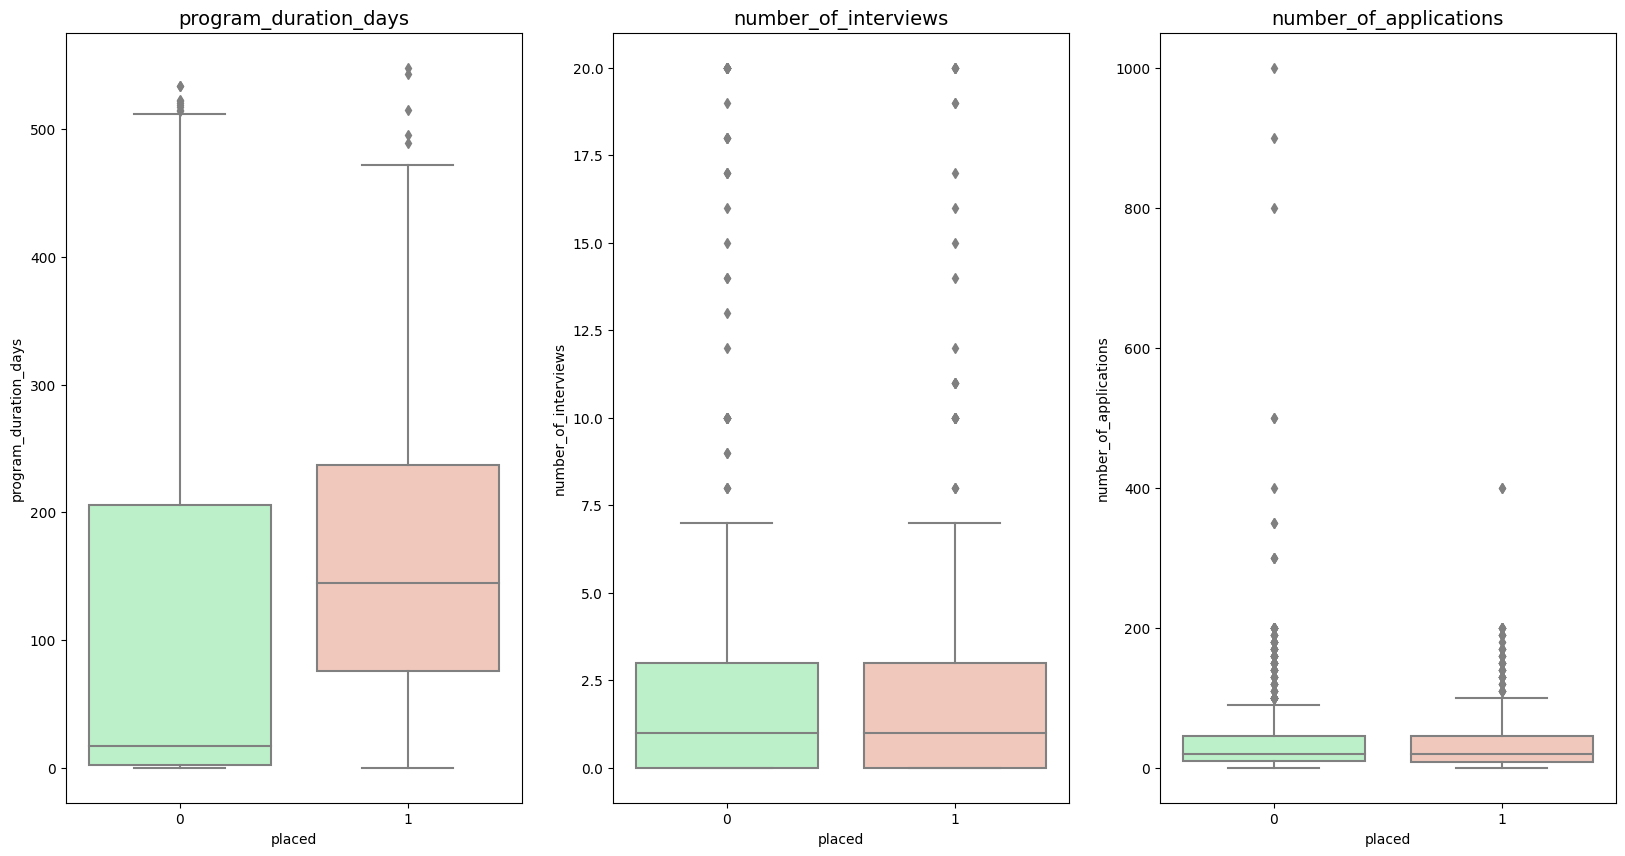

In [237]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

colors = ['#B3F9C5', '#f9c5b3']
sns.boxplot(x='placed', y='program_duration_days', data=df, palette=colors, ax=ax1)
ax1.set_title("program_duration_days", fontsize=14)


sns.boxplot(x='placed', y='number_of_interviews', data=df, palette=colors, ax=ax2)
ax2.set_title("number_of_interviews", fontsize=14)


sns.boxplot(x='placed', y='number_of_applications', data=df, palette=colors, ax=ax3)
ax3.set_title("number_of_applications", fontsize=14)

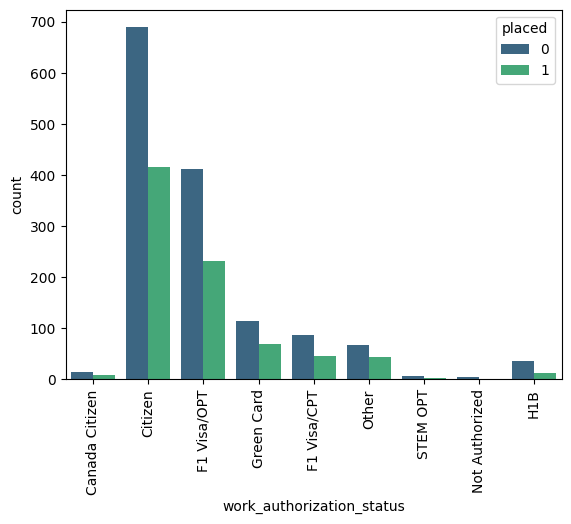

In [238]:
sns.countplot(x='work_authorization_status', data=df, hue='placed',palette='viridis')
plt.xticks(rotation=90)
plt.show()

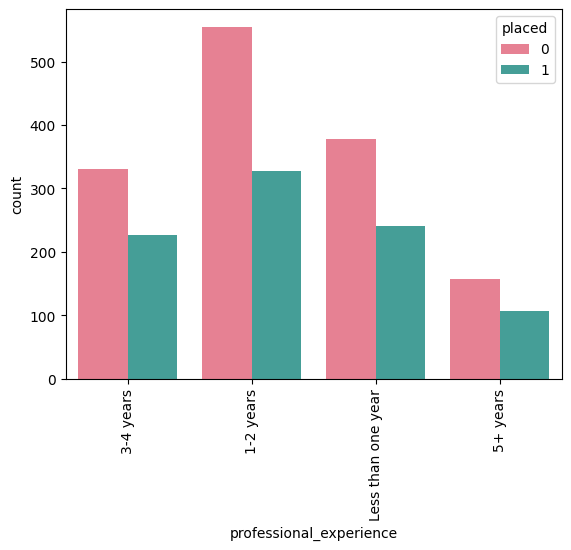

In [239]:
sns.countplot(x='professional_experience', data=df, hue='placed',palette='husl')
plt.xticks(rotation=90)
plt.show()

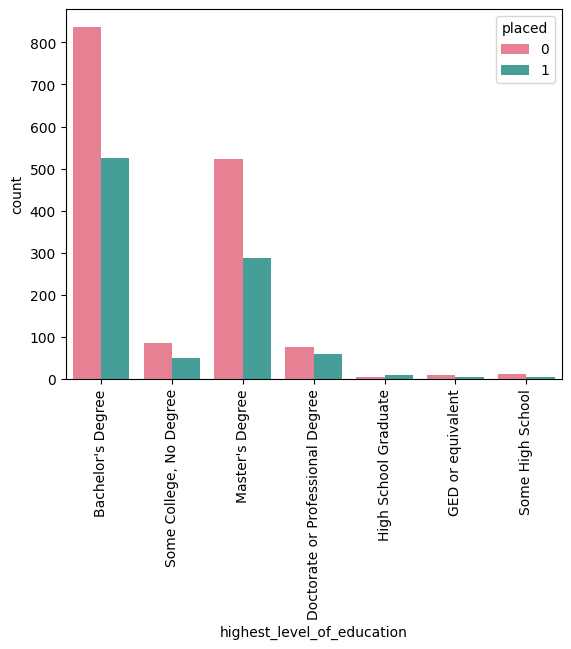

In [240]:
sns.countplot(x='highest_level_of_education', data=df, hue='placed',palette='husl')
plt.xticks(rotation=90)
plt.show()

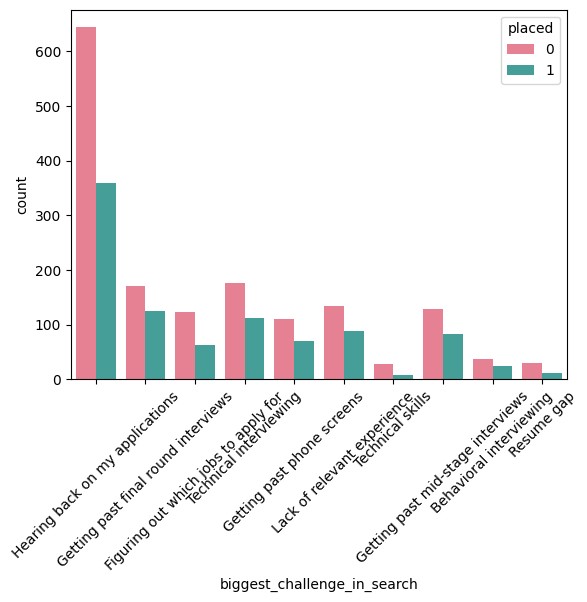

In [241]:
sns.countplot(x='biggest_challenge_in_search', data=df, hue='placed',palette='husl')
plt.xticks(rotation=45)
plt.show()

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def radial_plot(s):

    df_radil = s.value_counts()
    df_radil = pd.DataFrame(df_radil)
    df_radil.reset_index(inplace=True)
    df_radil.columns = [s.name, 'COUNT']
    df_radil = df_radil.sort_values(by=['COUNT'])

    max_value_full_ring = df_radil['COUNT'].sum()

    start_color = '#2f4b7c'
    end_color = '#ffa600'
    num_steps = len(df_radil)

    start_r, start_g, start_b = int(start_color[1:3], 16), int(start_color[3:5], 16), int(start_color[5:7], 16)
    end_r, end_g, end_b = int(end_color[1:3], 16), int(end_color[3:5], 16), int(end_color[5:7], 16)

    ring_colours = [start_color]

    for i in range(1, num_steps - 1):
        r = start_r + (i * (end_r - start_r)) // (num_steps - 1)
        g = start_g + (i * (end_g - start_g)) // (num_steps - 1)
        b = start_b + (i * (end_b - start_b)) // (num_steps - 1)

        ring_colours.append(f'#{r:02x}{g:02x}{b:02x}')

    ring_colours.append(end_color)

    ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df_radil[s.name]), list(df_radil['COUNT']))]
    data_len = len(df_radil)

    fig = plt.figure(figsize=(6,6), linewidth=10)
    rect = [0.1, 0.1, 0.8, 0.8]

    ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar_bg.set_theta_zero_location('N')
    ax_polar_bg.set_theta_direction(1)

    for i in range(data_len):
        ax_polar_bg.barh(i, 1.5*np.pi, color='grey', alpha=0.1)

    ax_polar_bg.axis('off')

    ax_polar = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar.set_theta_zero_location('N')
    ax_polar.set_theta_direction(1)
    ax_polar.set_rgrids([i for i in range(len(df_radil[s.name].unique()))],
                        labels=ring_labels,
                        angle=0,
                        fontsize=14, fontweight='bold',
                        color='black', verticalalignment='center')

    ax_polar.barh(range(data_len), df_radil['COUNT']*1.5*np.pi/max_value_full_ring,
                  color=ring_colours)
    ax_polar.grid(False)
    ax_polar.tick_params(axis='both', left=False, bottom=False,
                         labelbottom=False, labelleft=True)

# Example usage:
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to use for the radial plot.
# radial_plot(data[column_name])


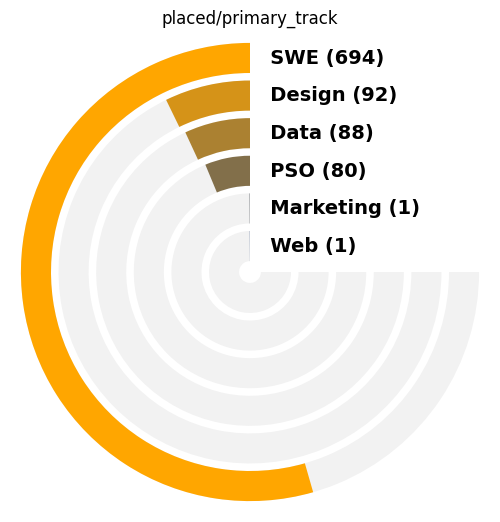

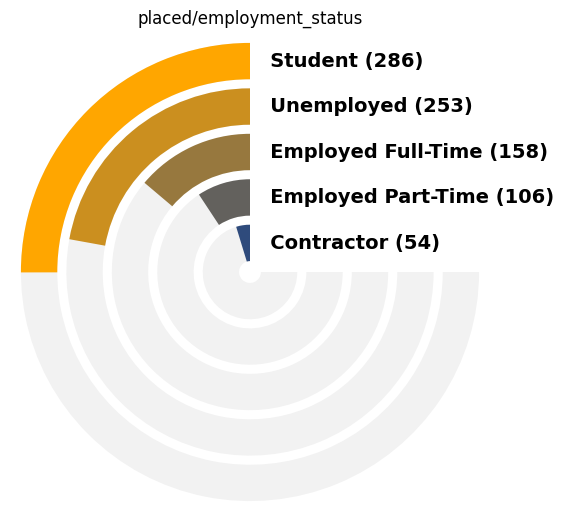

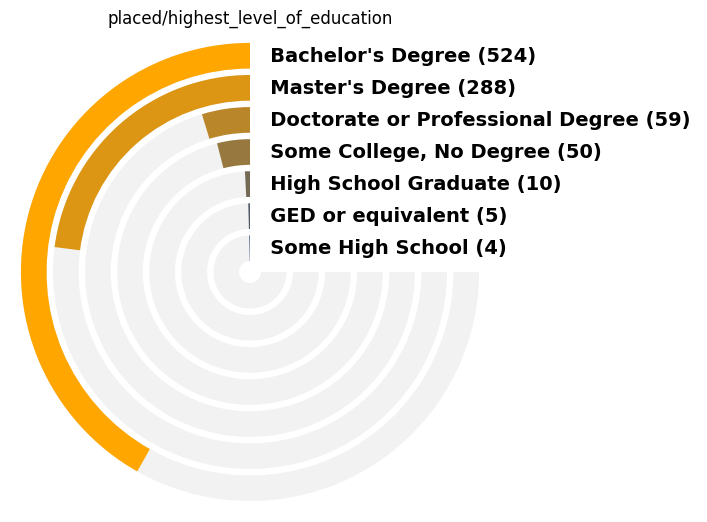

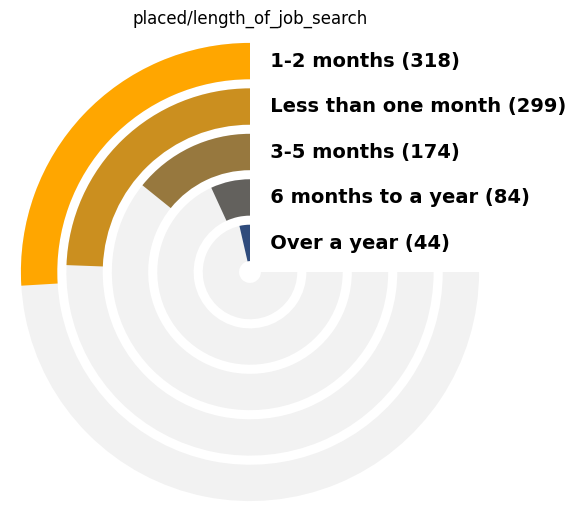

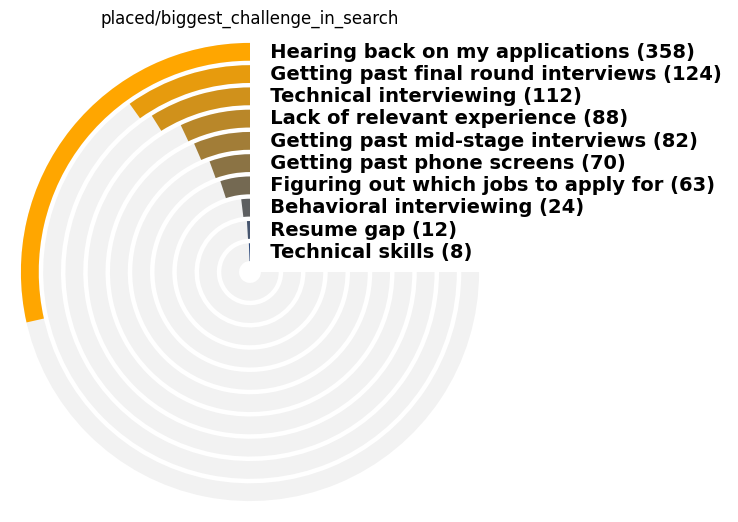

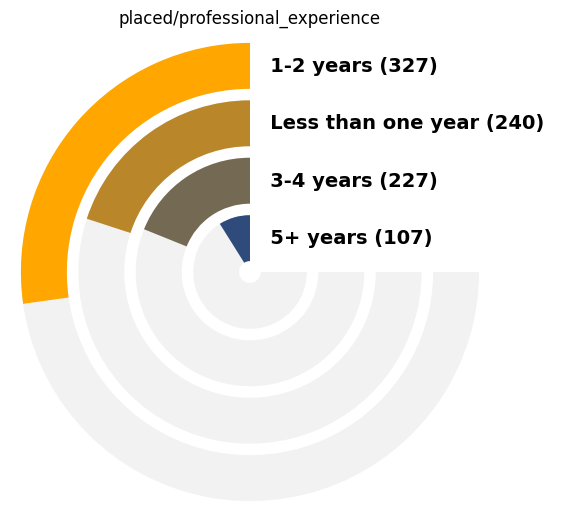

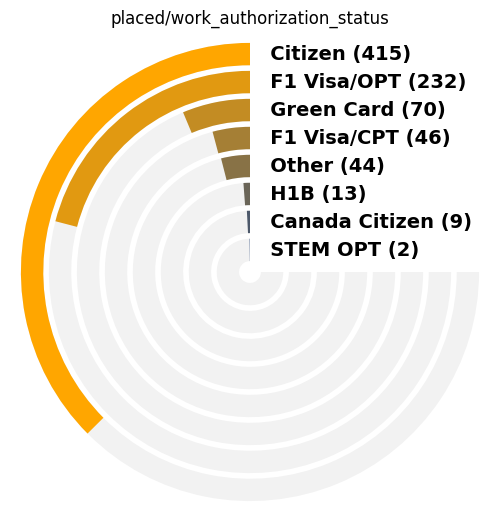

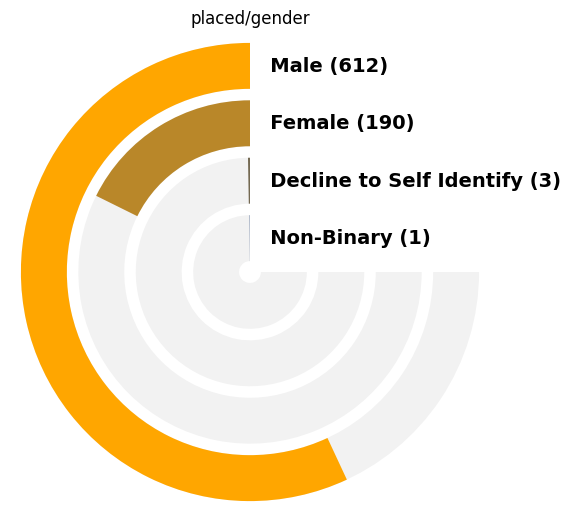

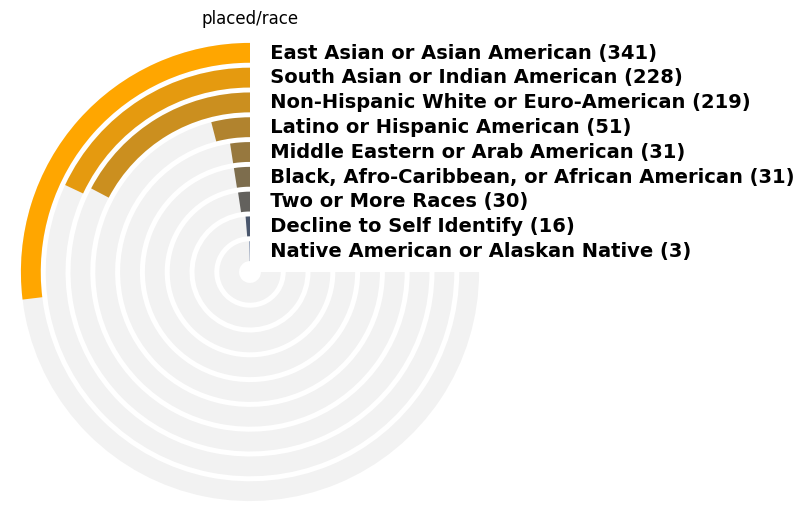

In [243]:
cols_name = ['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search',
             'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']

for j in cols_name:
    df_temp = df[[j, 'placed']].copy()
    df_temp = df_temp[df_temp['placed'] == 1]

    radial_plot(df_temp[j])
    plt.title('placed/{}'.format(j))
    plt.savefig(fname='placed_{}.png'.format(j), dpi=300, bbox_inches='tight', transparent=True)
    plt.show()  # Show the plot before moving to the next one


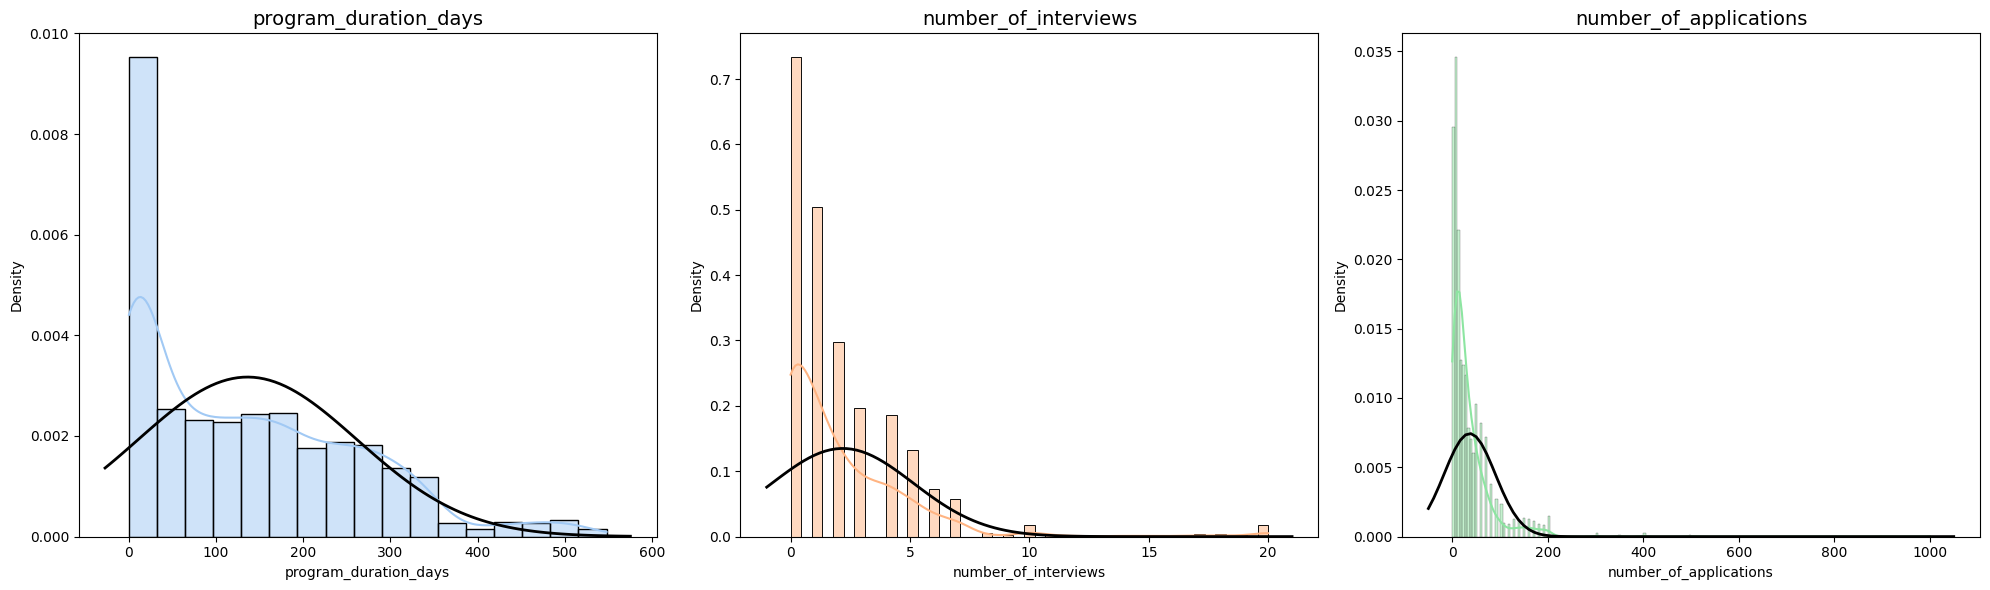

In [244]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
columns = ['program_duration_days', 'number_of_interviews', 'number_of_applications']
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, stat='density', color=sns.color_palette('pastel')[i-1])
    mu, std = norm.fit(df[column].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(column, fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-245-7e44374e6c48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-245-7e44374e6c48>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-24

Text(0.5, 1.0, 'number of applications')

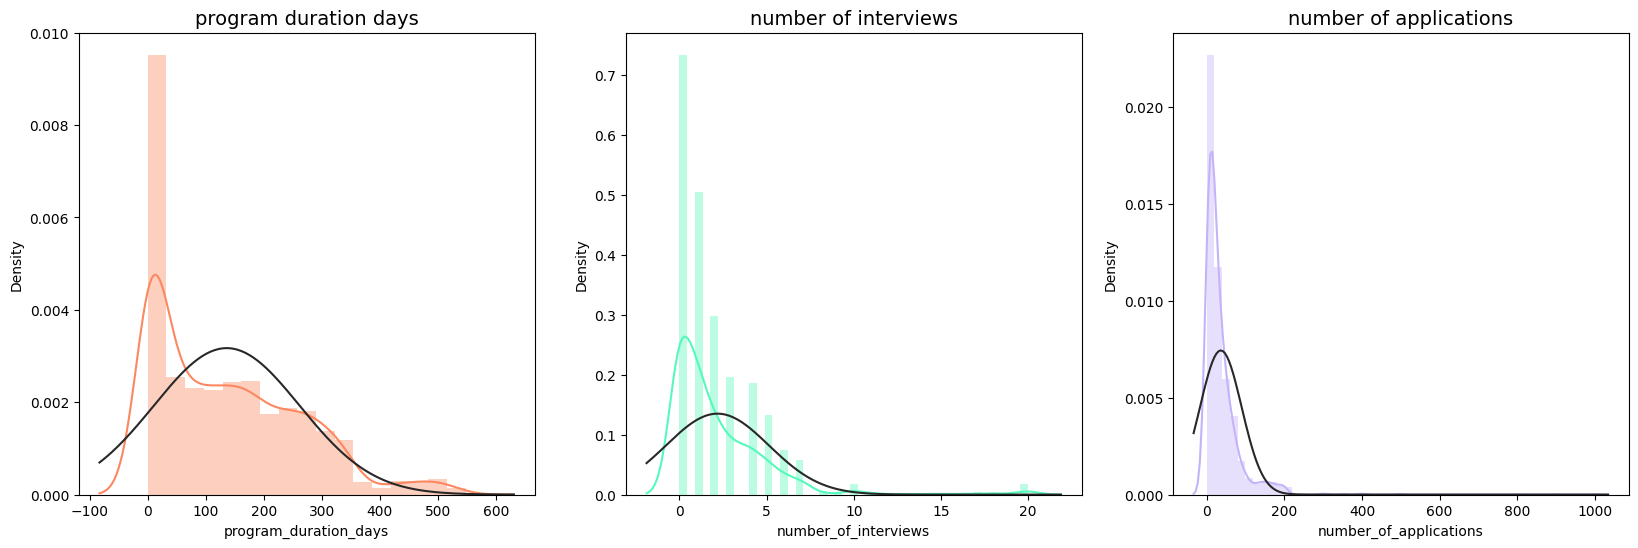

In [245]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = df['program_duration_days']
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days', fontsize=14)

number_of_interviews = df['number_of_interviews']
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews', fontsize=14)

number_of_applications = df['number_of_applications']
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications', fontsize=14)

<ipython-input-246-66174d84dd4f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-246-66174d84dd4f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-24

Text(0.5, 1.0, 'number of applications \n (placed)')

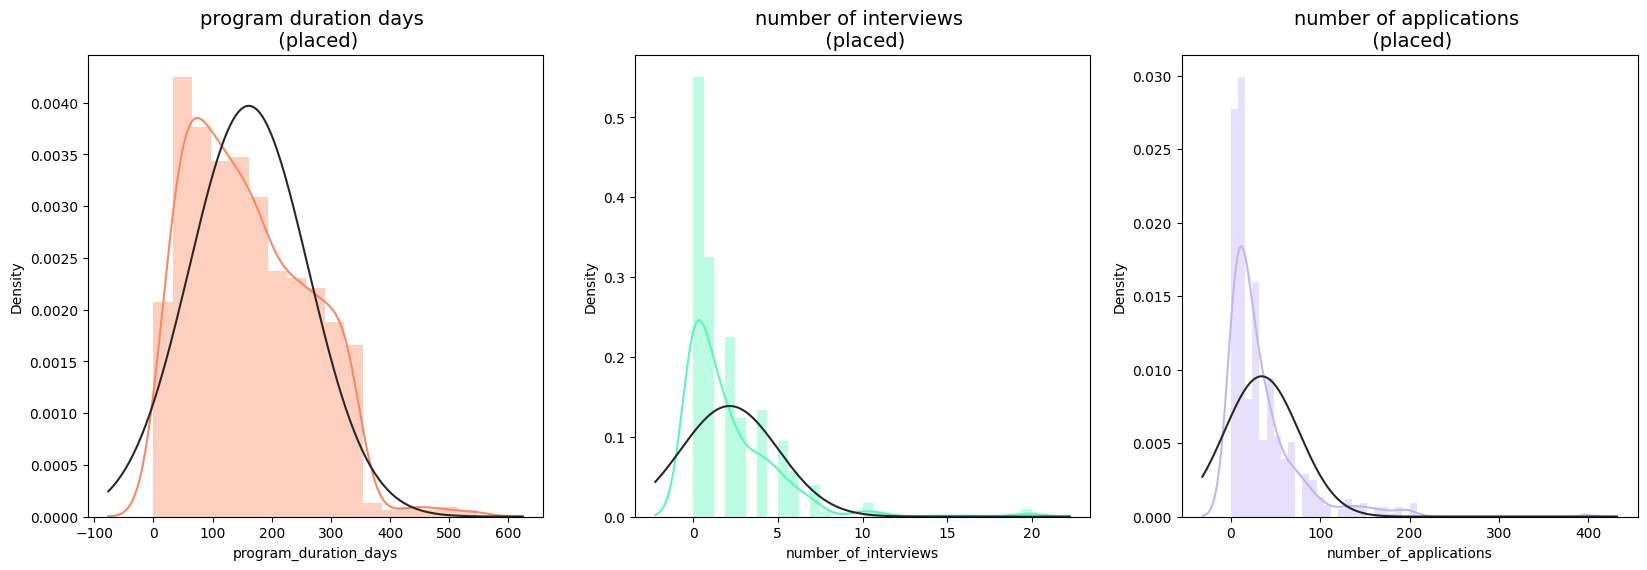

In [246]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = df['program_duration_days'][df['placed'] == 1]
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days \n (placed)', fontsize=14)

number_of_interviews = df['number_of_interviews'][df['placed'] == 1]
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews \n (placed)', fontsize=14)

number_of_applications = df['number_of_applications'][df['placed'] == 1]
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications \n (placed)', fontsize=14)

<ipython-input-247-f8f7b0557cb7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-247-f8f7b0557cb7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-24

Text(0.5, 1.0, 'number of applications \n (not placed)')

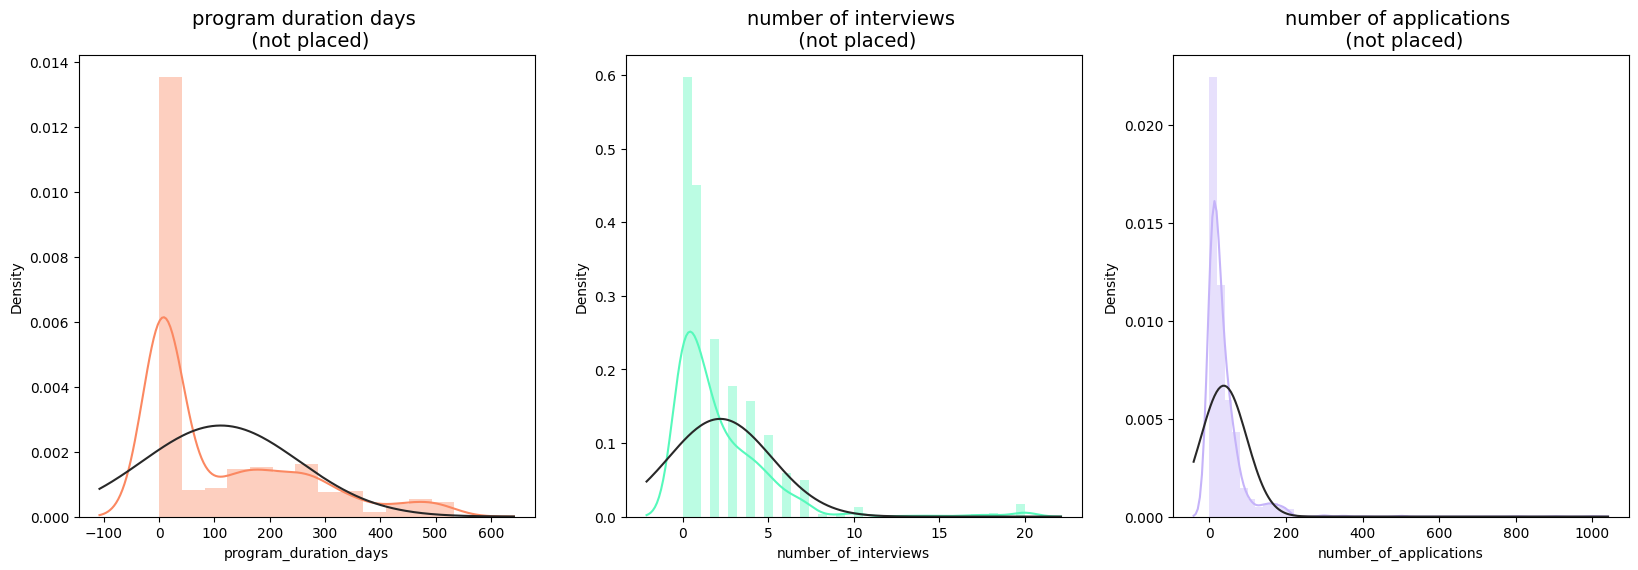

In [247]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = df['program_duration_days'][df['placed'] == 0]
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days \n (not placed)', fontsize=14)

number_of_interviews = df['number_of_interviews'][df['placed'] == 0]
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews \n (not placed)', fontsize=14)

number_of_applications = df['number_of_applications'][df['placed'] == 0]
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications \n (not placed)', fontsize=14)

In [248]:
df['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A', nan],
      dtype=object)

In [249]:
df['cohort_tag'].replace(np.nan,'JAN19A',inplace=True)

In [250]:
df['cohort_tag_month'] = df['cohort_tag'].apply(lambda x: x[:-3])

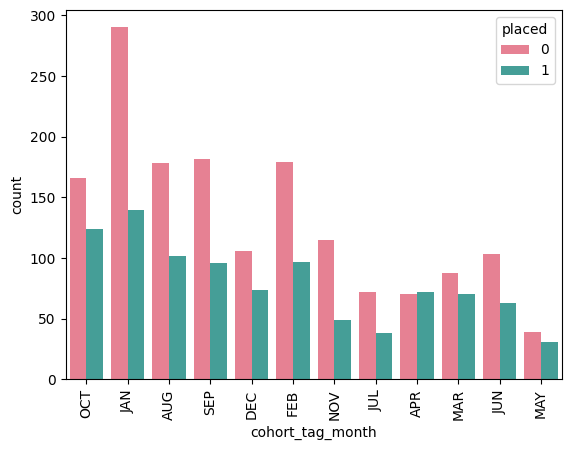

In [251]:
sns.countplot(x='cohort_tag_month', data=df, hue='placed',palette='husl')
plt.xticks(rotation=90)
plt.show()

In [252]:
df_days['program_duration_days'].value_counts()

Series([], Name: program_duration_days, dtype: int64)

In [253]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       0
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
cohort_tag_month                 0
dtype: int64

In [254]:
df.dropna(subset=['program_duration_days'],inplace=True)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1928 non-null   object 
 1   primary_track                1928 non-null   object 
 2   cohort_tag                   1928 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       1928 non-null   int64  
 5   employment_status            1746 non-null   object 
 6   highest_level_of_education   1886 non-null   object 
 7   length_of_job_search         1862 non-null   object 
 8   biggest_challenge_in_search  1908 non-null   object 
 9   professional_experience      1767 non-null   object 
 10  work_authorization_status    1707 non-null   object 
 11  number_of_interviews         1756 non-null   float64
 12  number_of_applications       1928 non-null   int64  
 13  gender            

In [256]:
df['program_duration_days'].isnull().sum()

0

In [257]:
df['pathrise_status'].value_counts()

Placed                956
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
Deferred               34
Name: pathrise_status, dtype: int64

In [258]:
df

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_tag_month
2,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,AUG
3,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,AUG
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG
5,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American,AUG
6,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American",AUG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,Closed Lost,PSO,SEP19B,0.0,0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,NaN,South Asian or Indian American,SEP
2538,Withdrawn,SWE,JUL19B,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American,JUL
2539,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,JUN
2540,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN


In [259]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_tag_month
0,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,AUG
1,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,AUG
2,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG
3,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American,AUG
4,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American",AUG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,Closed Lost,PSO,SEP19B,0.0,0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,NaN,South Asian or Indian American,SEP
1924,Withdrawn,SWE,JUL19B,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American,JUL
1925,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,JUN
1926,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN


In [260]:
df.columns=df.columns.str.strip()

In [261]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race', 'cohort_tag_month'],
      dtype='object')

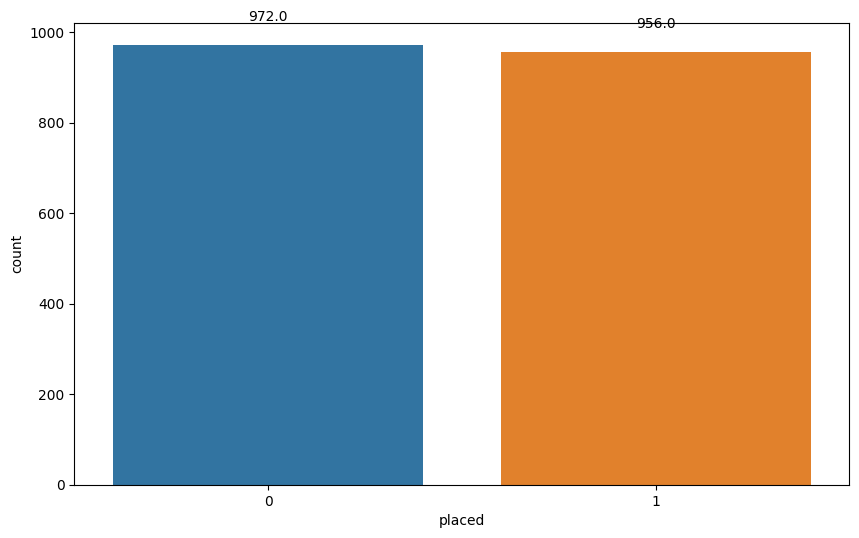

In [262]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x="placed", data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')#???

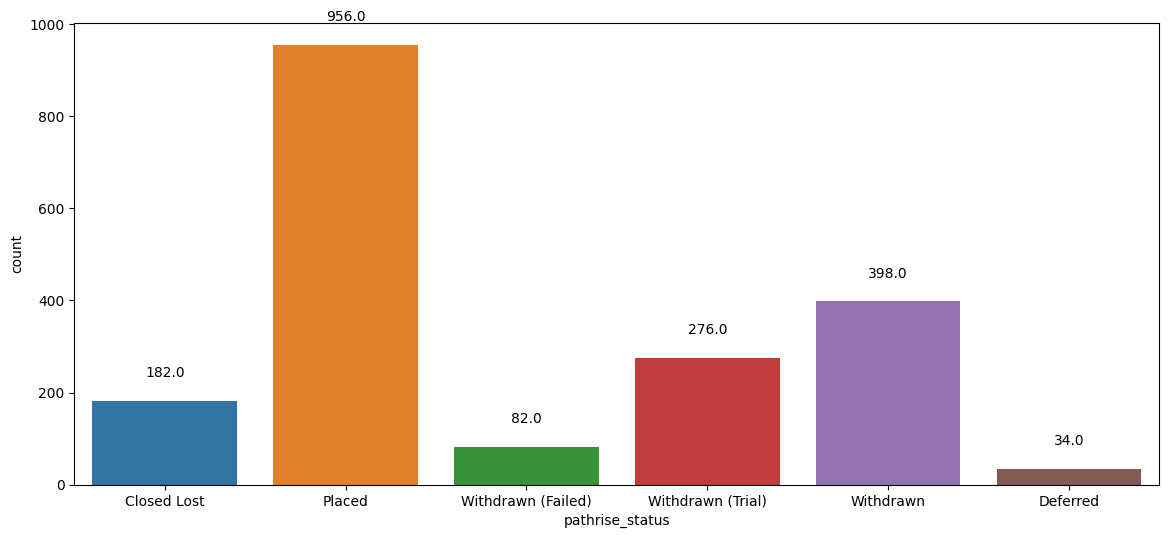

In [263]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="pathrise_status", data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

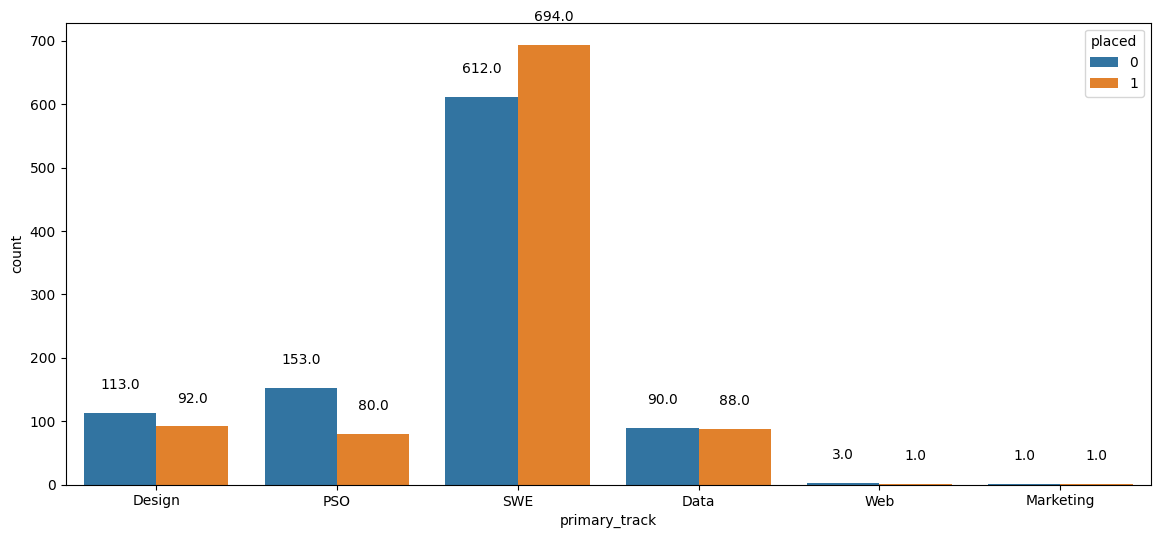

In [264]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="primary_track", data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

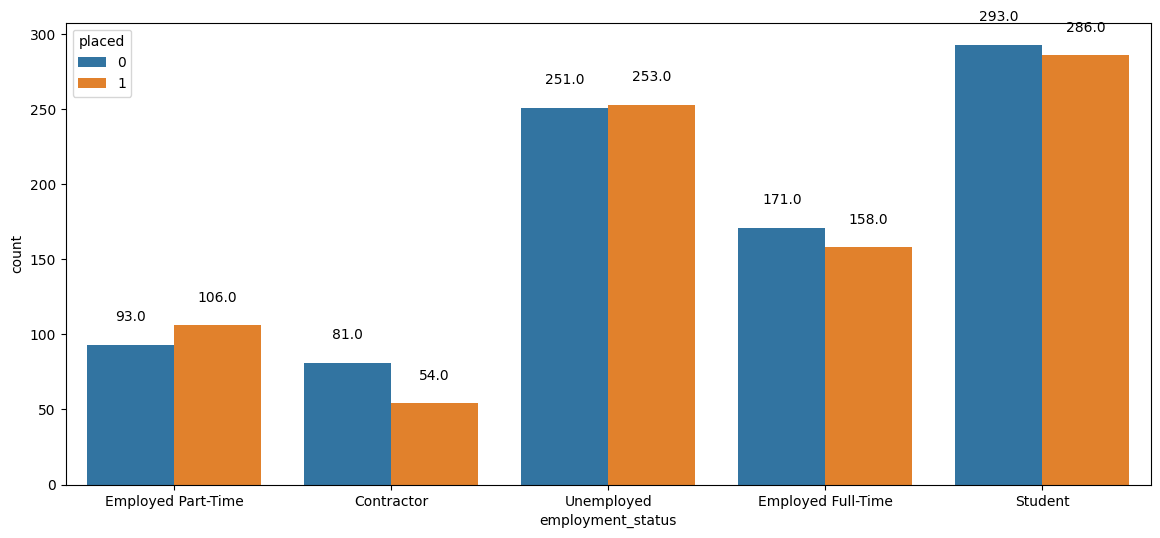

In [265]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x='employment_status', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

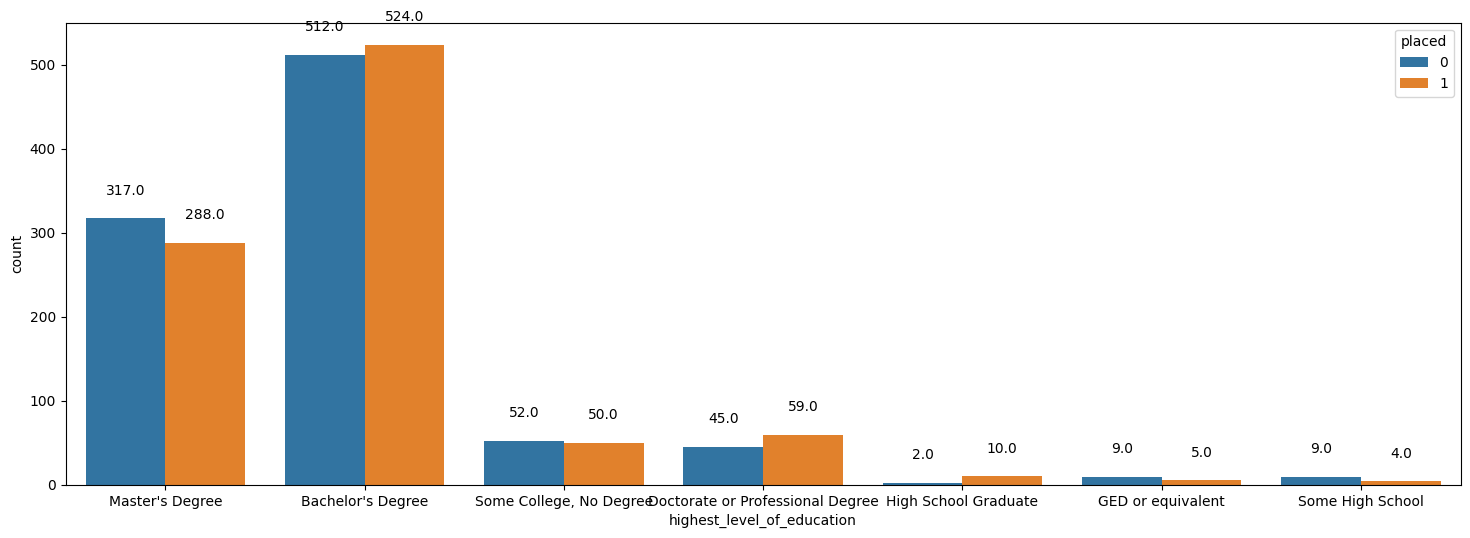

In [266]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='highest_level_of_education', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [267]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         737
Getting past final round interviews     234
Technical interviewing                  224
Lack of relevant experience             175
Getting past mid-stage interviews       160
Getting past phone screens              148
Figuring out which jobs to apply for    131
Behavioral interviewing                  43
Resume gap                               30
Technical skills                         26
Name: biggest_challenge_in_search, dtype: int64

In [268]:
df['biggest_challenge_in_search'].isnull().sum()

20

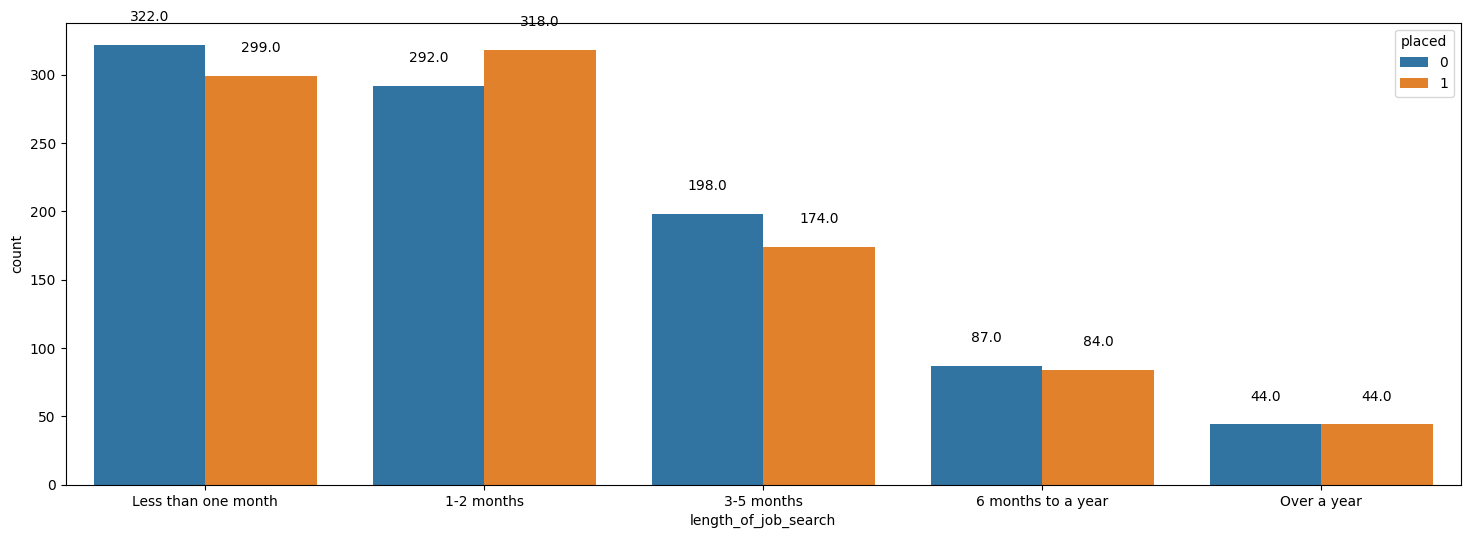

In [269]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='length_of_job_search', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

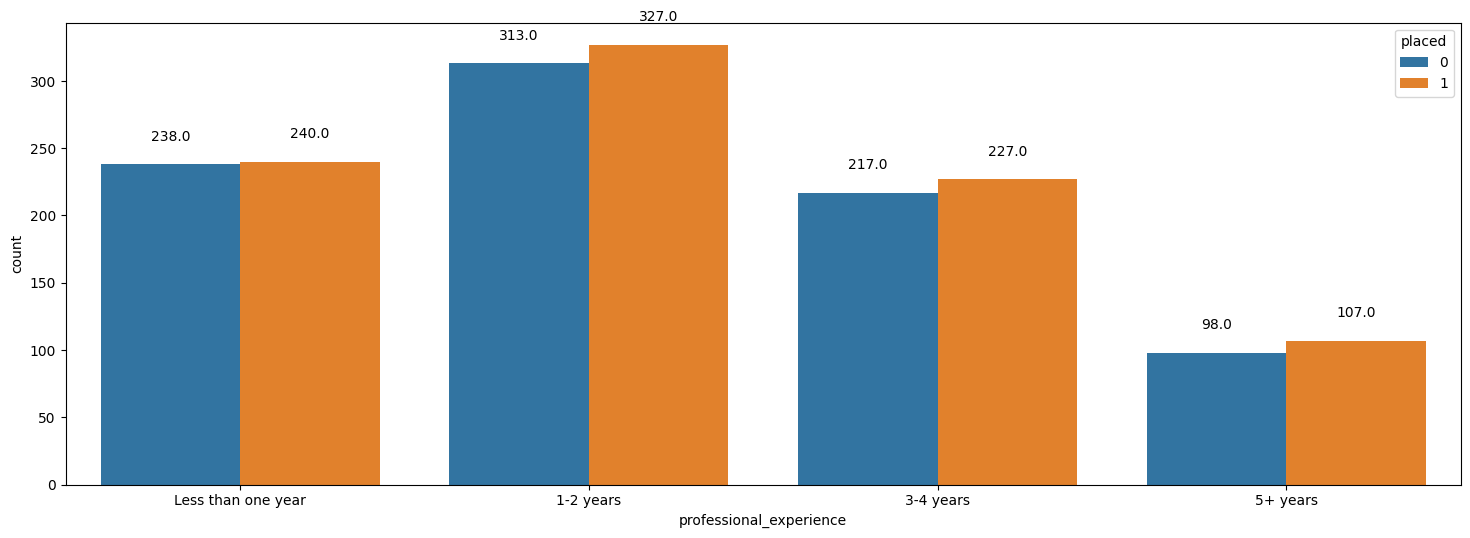

In [270]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='professional_experience', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

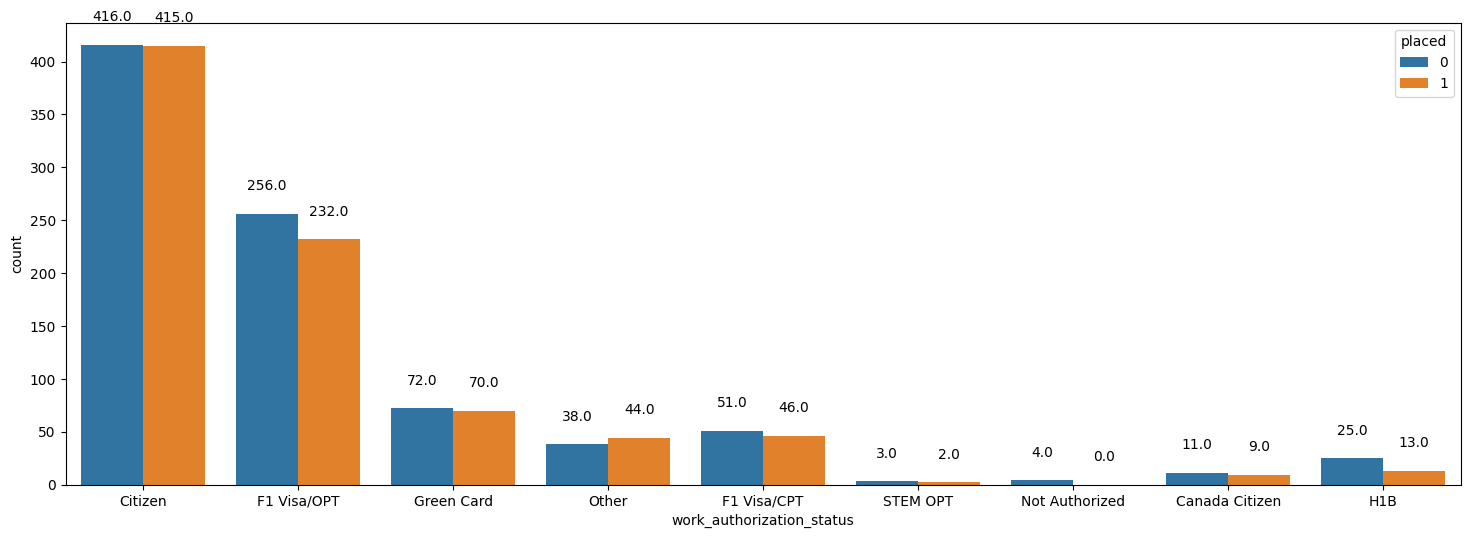

In [271]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='work_authorization_status', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [272]:
df['work_authorization_status'].value_counts()

Citizen           831
F1 Visa/OPT       488
Green Card        142
F1 Visa/CPT        97
Other              82
H1B                38
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: work_authorization_status, dtype: int64

In [273]:
df['employment_status'].value_counts()

Student               579
Unemployed            504
Employed Full-Time    329
Employed Part-Time    199
Contractor            135
Name: employment_status, dtype: int64

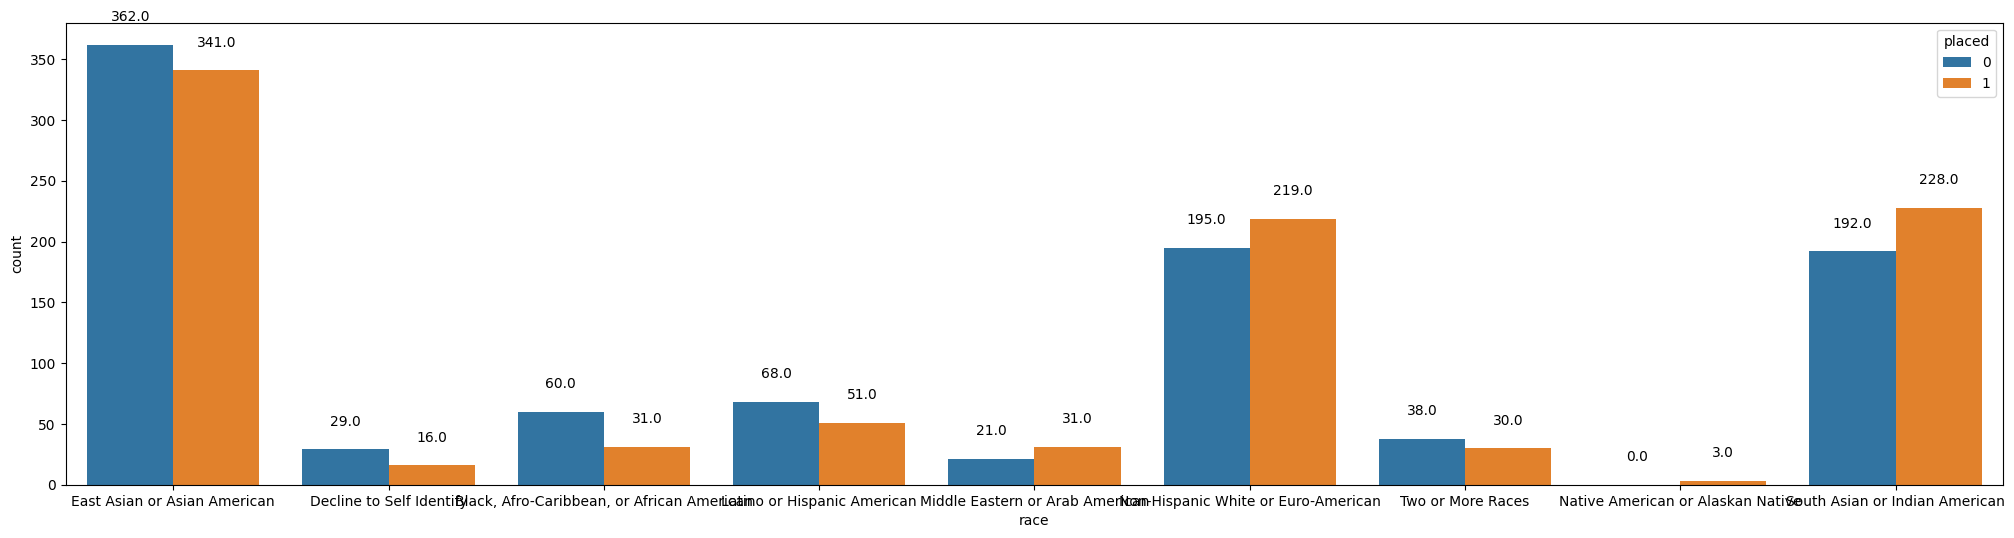

In [274]:
fig, ax = plt.subplots(figsize=(25,6))
ax = sns.countplot(x='race', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [275]:
df_num=df[['program_duration_days','number_of_interviews','number_of_applications','placed']]
print(df_num.info())
print(df_num.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   program_duration_days   1928 non-null   float64
 1   number_of_interviews    1756 non-null   float64
 2   number_of_applications  1928 non-null   int64  
 3   placed                  1928 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 60.4 KB
None
program_duration_days       0
number_of_interviews      172
number_of_applications      0
placed                      0
dtype: int64


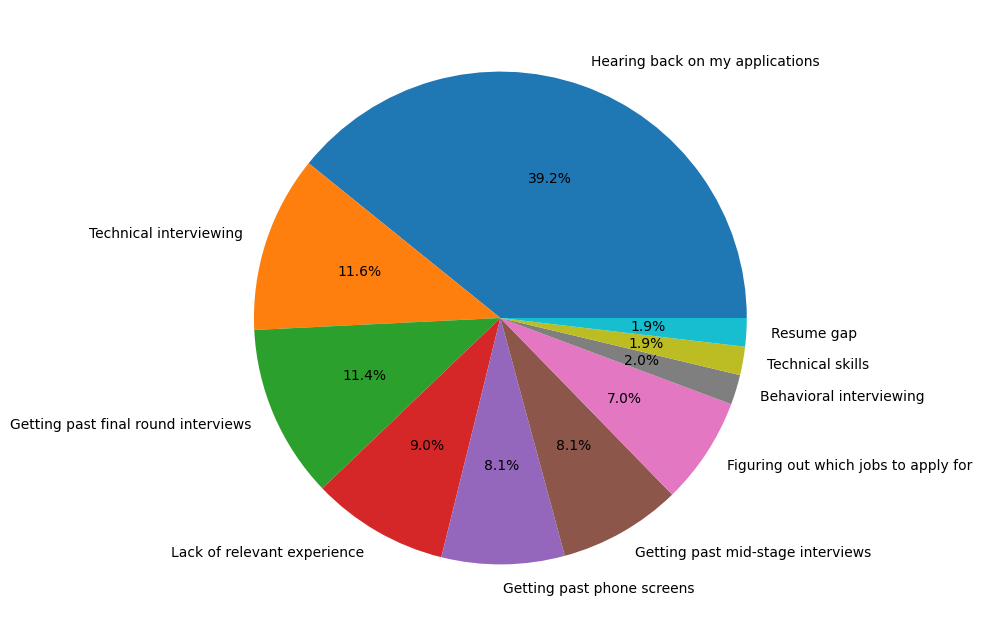

In [276]:
df_failed=df[df['placed']==0]
df_success=df[df['placed']==1]

#Get the count of each category
counts = df_failed['biggest_challenge_in_search'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(8,8))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

In [ ]:
sns.displot(x='program_duration_days', data=df_num, hue='placed')

In [ ]:
sns.displot(x='program_duration_days', data=df_success)

In [ ]:
sns.displot(x='program_duration_days', data=df_failed)

In [ ]:
sns.displot(x='number_of_applications', data=df_success)

In [ ]:
sns.displot(x='number_of_applications', data=df_failed)

In [ ]:
sns.displot(x='number_of_interviews', data=df_success)

In [ ]:
sns.displot(x='number_of_interviews', data=df_failed)

<Axes: xlabel='program_duration_days'>

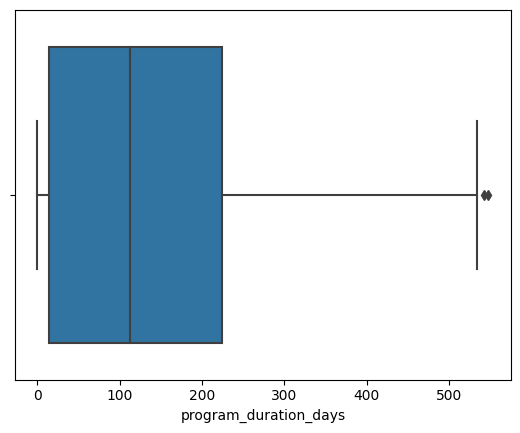

In [277]:
sns.boxplot(x='program_duration_days', data=df)

In [278]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['program_duration_days'].quantile(0.25)
Q3 = df['program_duration_days'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['program_duration_days'] < (Q1 - 1.5 * IQR)) | (df['program_duration_days'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='program_duration_days'>

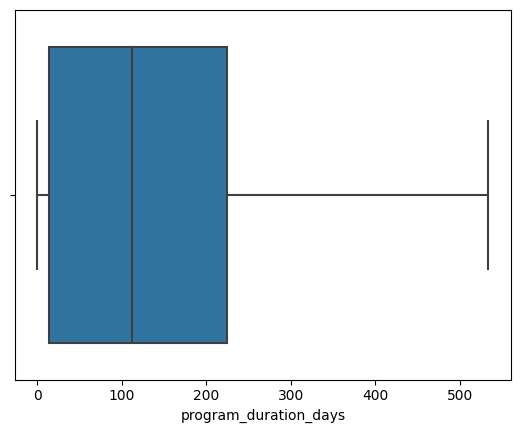

In [279]:
sns.boxplot(x='program_duration_days', data=df)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1927
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1926 non-null   object 
 1   primary_track                1926 non-null   object 
 2   cohort_tag                   1926 non-null   object 
 3   program_duration_days        1926 non-null   float64
 4   placed                       1926 non-null   int64  
 5   employment_status            1744 non-null   object 
 6   highest_level_of_education   1884 non-null   object 
 7   length_of_job_search         1860 non-null   object 
 8   biggest_challenge_in_search  1906 non-null   object 
 9   professional_experience      1765 non-null   object 
 10  work_authorization_status    1705 non-null   object 
 11  number_of_interviews         1754 non-null   float64
 12  number_of_applications       1926 non-null   int64  
 13  gender            

<Axes: xlabel='number_of_applications'>

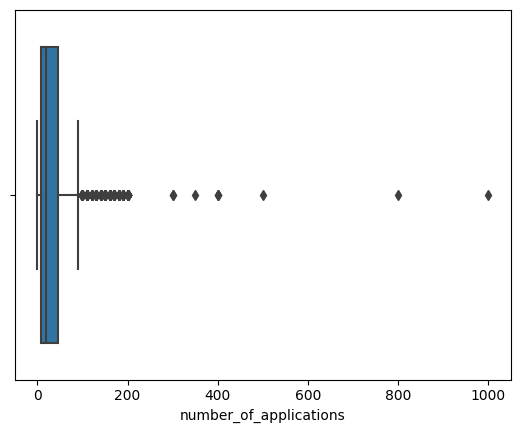

In [281]:
sns.boxplot(x='number_of_applications', data=df)

In [282]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_applications'].quantile(0.25)
Q3 = df['number_of_applications'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_applications'] < (Q1 - 1.5 * IQR)) | (df['number_of_applications'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='number_of_applications'>

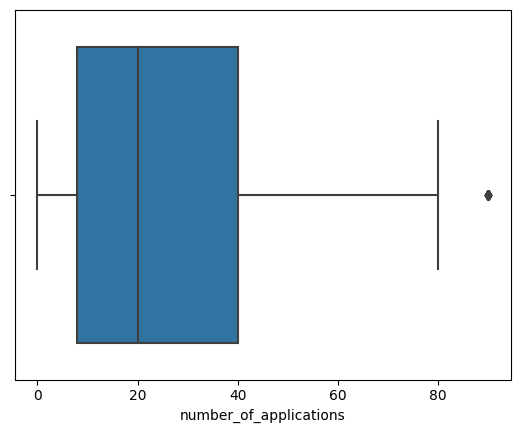

In [283]:
sns.boxplot(x='number_of_applications', data=df)

In [284]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_applications'].quantile(0.25)
Q3 = df['number_of_applications'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_applications'] < (Q1 - 1.5 * IQR)) | (df['number_of_applications'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='number_of_applications'>

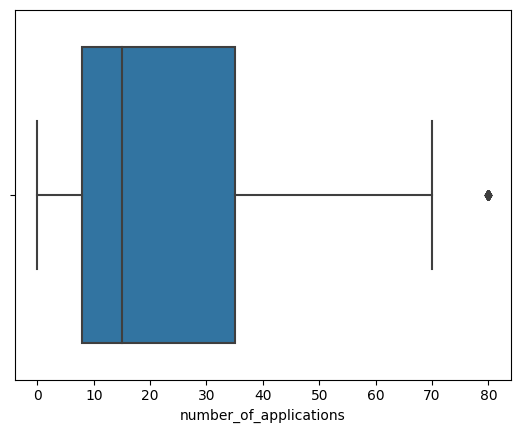

In [285]:
sns.boxplot(x='number_of_applications', data=df)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1927
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1745 non-null   object 
 1   primary_track                1745 non-null   object 
 2   cohort_tag                   1745 non-null   object 
 3   program_duration_days        1745 non-null   float64
 4   placed                       1745 non-null   int64  
 5   employment_status            1575 non-null   object 
 6   highest_level_of_education   1707 non-null   object 
 7   length_of_job_search         1681 non-null   object 
 8   biggest_challenge_in_search  1728 non-null   object 
 9   professional_experience      1596 non-null   object 
 10  work_authorization_status    1538 non-null   object 
 11  number_of_interviews         1590 non-null   float64
 12  number_of_applications       1745 non-null   int64  
 13  gender            

<Axes: xlabel='number_of_interviews'>

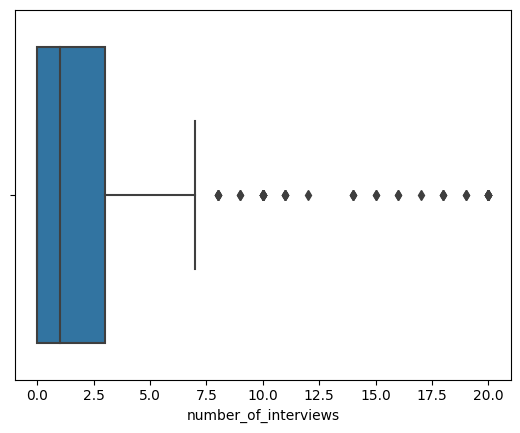

In [287]:
sns.boxplot(x='number_of_interviews', data=df)

In [288]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_interviews'].quantile(0.25)
Q3 = df['number_of_interviews'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_interviews'] < (Q1 - 1.5 * IQR)) | (df['number_of_interviews'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='number_of_interviews'>

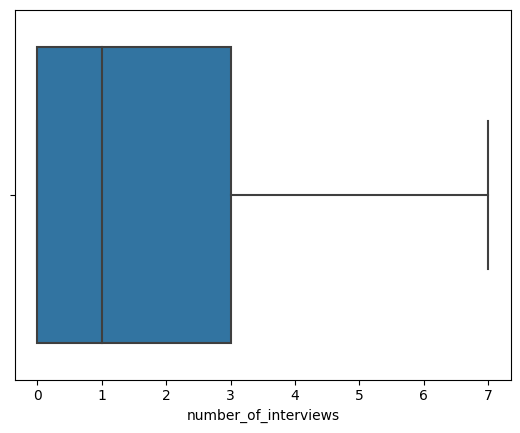

In [289]:
sns.boxplot(x='number_of_interviews', data=df)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 1927
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1701 non-null   object 
 1   primary_track                1701 non-null   object 
 2   cohort_tag                   1701 non-null   object 
 3   program_duration_days        1701 non-null   float64
 4   placed                       1701 non-null   int64  
 5   employment_status            1534 non-null   object 
 6   highest_level_of_education   1664 non-null   object 
 7   length_of_job_search         1637 non-null   object 
 8   biggest_challenge_in_search  1684 non-null   object 
 9   professional_experience      1555 non-null   object 
 10  work_authorization_status    1496 non-null   object 
 11  number_of_interviews         1546 non-null   float64
 12  number_of_applications       1701 non-null   int64  
 13  gender            

In [291]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       0
program_duration_days            0
placed                           0
employment_status              167
highest_level_of_education      37
length_of_job_search            64
biggest_challenge_in_search     17
professional_experience        146
work_authorization_status      205
number_of_interviews           155
number_of_applications           0
gender                         329
race                            10
cohort_tag_month                 0
dtype: int64

In [292]:
df['employment_status'].value_counts()

Student               512
Unemployed            437
Employed Full-Time    288
Employed Part-Time    175
Contractor            122
Name: employment_status, dtype: int64

In [293]:
df['employment_status'].fillna(df['employment_status'].mode()[0],inplace=True)

In [294]:
print(df['employment_status'].value_counts())
print(df['cohort_tag'].isnull().sum())

Student               679
Unemployed            437
Employed Full-Time    288
Employed Part-Time    175
Contractor            122
Name: employment_status, dtype: int64
0


In [295]:
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0],inplace=True)

In [296]:
df['length_of_job_search'].fillna(df['length_of_job_search'].mode()[0],inplace=True)

In [297]:
df['professional_experience'].fillna(df['professional_experience'].mode()[0],inplace=True)

In [298]:
df['work_authorization_status'].fillna('missing',inplace=True)

In [299]:
df['number_of_interviews'].fillna(df['number_of_interviews'].mean(),inplace=True)

In [300]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [301]:
df['race'].fillna(df['race'].mode()[0],inplace=True)

In [302]:
df.isnull().sum()

pathrise_status                 0
primary_track                   0
cohort_tag                      0
program_duration_days           0
placed                          0
employment_status               0
highest_level_of_education      0
length_of_job_search            0
biggest_challenge_in_search    17
professional_experience         0
work_authorization_status       0
number_of_interviews            0
number_of_applications          0
gender                          0
race                            0
cohort_tag_month                0
dtype: int64

In [303]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race', 'cohort_tag_month'],
      dtype='object')

In [304]:
# Extract the required columns
column1 = pd.to_numeric(df['gender'], errors='coerce')
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)#???

Correlation coefficient: nan


In [305]:
# Extract the required columns
#column1 = pd.to_numeric(df['length_of_job_search'], errors='coerce')
column1 =df['number_of_interviews']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.013366403538921719


In [306]:
column1 =df['number_of_applications']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.015303062262369745


In [307]:
column1 =df['program_duration_days']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.18889719045351502


In [308]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race', 'cohort_tag_month'],
      dtype='object')

In [309]:
Pathrise_status=pd.get_dummies(df['pathrise_status'],drop_first=True)
Primary_track=pd.get_dummies(df['primary_track'],drop_first=True)
Cohort_tag_month=pd.get_dummies(df['cohort_tag_month'],drop_first=True)
Employment_status= pd.get_dummies(df['employment_status'],drop_first=True)
Highest_level_of_education=pd.get_dummies(df['highest_level_of_education'],drop_first=True)
Length_of_job_search=pd.get_dummies(df['length_of_job_search'],drop_first=True)
Biggest_challenge_in_search=pd.get_dummies(df['biggest_challenge_in_search'],drop_first=True)
Professional_experience=pd.get_dummies(df['professional_experience'],drop_first=True)
Work_authorization_status=pd.get_dummies(df['work_authorization_status'],drop_first=True)
Gender=pd.get_dummies(df['gender'],drop_first=True)
Race=pd.get_dummies(df['race'],drop_first=True)

In [310]:
df.drop(['pathrise_status','primary_track','cohort_tag','cohort_tag_month','employment_status','highest_level_of_education','length_of_job_search','biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race'],axis=1,inplace=True)

In [311]:
df=pd.concat([Pathrise_status,Cohort_tag_month,Primary_track,Employment_status,Highest_level_of_education,Length_of_job_search,Biggest_challenge_in_search,Professional_experience,Work_authorization_status,Gender,Race,df],axis=1)

df.head()

,Deferred,Placed,Withdrawn,Withdrawn (Failed),Withdrawn (Trial),AUG,DEC,FEB,JAN,JUL,...,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races,program_duration_days,placed,number_of_interviews,number_of_applications
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0,5.0,25
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0.0,9
5,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,19.0,0,4.0,15
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,13.0,0,0.0,10


In [312]:
X =  df.drop(['program_duration_days','placed','number_of_interviews','number_of_applications'],axis=1)
y = df['program_duration_days']

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [314]:
residual= y_test-predictions

In [315]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 64.27756640827027


In [316]:
from sklearn.metrics import r2_score
# Calculate the R² score
r2_score = r2_score(y_test, predictions)

# Print the R² score
print("R² score:", r2_score)


R² score: 0.5197479761837605


In [317]:
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

# Decision Tree Regression
tree_reg_model = DecisionTreeRegressor(random_state=42)
tree_reg_model.fit(X_train, y_train)
tree_reg_predictions = tree_reg_model.predict(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Calculate evaluation metrics
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)

tree_reg_mae = mean_absolute_error(y_test, tree_reg_predictions)
tree_reg_mse = mean_squared_error(y_test, tree_reg_predictions)
tree_reg_rmse = mean_squared_error(y_test, tree_reg_predictions, squared=False)

svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

# Display the results in a table with changed rows and columns
table_data = [
    ["Model", "Linear Regression", "Decision Tree Regression", "Support Vector Regression"],
    ["MAE", f"{linear_reg_mae:.1f}", f"{tree_reg_mae:.1f}", f"{svr_mae:.1f}"],
    ["MSE", f"{linear_reg_mse:.1f}", f"{tree_reg_mse:.1f}", f"{svr_mse:.1f}"],
    ["RMSE", f"{linear_reg_rmse:.1f}", f"{tree_reg_rmse:.1f}", f"{svr_rmse:.1f}"]
]

headers = table_data[0]

# Print the table
print(tabulate(table_data[1:], headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))


╒═════════╤═════════════════════╤════════════════════════════╤═════════════════════════════╕
│  Model  │  Linear Regression  │  Decision Tree Regression  │  Support Vector Regression  │
╞═════════╪═════════════════════╪════════════════════════════╪═════════════════════════════╡
│   MAE   │        64.3         │            80.3            │             101             │
├─────────┼─────────────────────┼────────────────────────────┼─────────────────────────────┤
│   MSE   │       7531.6        │          14353.6           │           15433.2           │
├─────────┼─────────────────────┼────────────────────────────┼─────────────────────────────┤
│  RMSE   │        86.8         │           119.8            │            124.2            │
╘═════════╧═════════════════════╧════════════════════════════╧═════════════════════════════╛


In [318]:
results = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
results

,Actual,Predicted
1500,0.0,1.476067
331,220.0,175.789978
779,43.0,146.554523
631,254.0,186.684029
849,12.0,39.749878
...,...,...
548,40.0,128.747444
1440,319.0,163.541489
596,307.0,193.815307
1421,11.0,20.271121
